<a href="https://colab.research.google.com/github/eksalailia/ProjectMagang/blob/main/ProjectMagang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 5.4 MB/s 
     |████████████████████████████████| 749 kB 49.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [2]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install requests-html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install pygooglenews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip3 install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 5.3 MB/s 
     |████████████████████████████████| 7.4 MB 28.1 MB/s 
     |████████████████████████████████| 93 kB 2.1 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=ae013e5e462b988ee5044aedef9d123153d170333d9faf1d784612db29e70df6
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=4886ab1fabc7b8b982b4580d8815e44eff87a16f4c8330abecc451a3434ccb9d
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=5fba65b426712b23f7db9f7beb1727398bf5c37b20348a77c364c7ca78b5d321
  Stored in directory: /root/.cache/pip/

In [8]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.3 MB/s 


In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
from pygooglenews import GoogleNews
from time import sleep
from datetime import date
# import period
import datetime
import pandas as pd
from newspaper import Article
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
# membaca file sastrawi indonesia
f = open("stop words.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

len(stopword_list)

758

In [15]:
gn = GoogleNews(lang = "id", country = "ID")

# gn = GoogleNews(start="02/01/2020",end="02/28/2020")
# Function to get our search terms and parse the data


def get_titles(search):
  # Empty list to store acquired headlines
  stories = []

  # Grab our search term and generate list based on our parameters
  search = gn.search(search)
  newsitem = search['entries']

   # untuk stemming data
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  for item in newsitem:
    story = {
        'title': item.title,
        'link': item.link,
        'posted': item.published,
        'stemming' : stemmer.stem(item.title),
        'word_tokens' : word_tokenize((stemmer.stem(item.title))),
        'stop_words' : [w for w in word_tokenize(item.title) if not w in stopword_list ],
        'total_kata' : len([w for w in word_tokenize(item.title) if not w in stopword_list ]),

        # 'content': item.docs
    }
    # Add our criteria to the list
    stories.append(story)

  # Print the list of headlines and links to be perused
  for section in stories:
    print(f"{section['title']}:\n{section['link']}\n:\n{section['posted']}:\n{section['stemming']}:\n{section['word_tokens']}:\n{section['stop_words']}:\n{section['total_kata']}")
    print("---------------------------------------------------------------------------------------------------------------")
    print()

    sleep(0)

  return stories


In [18]:
# Function call and keyword request
search = input('Cari keyword berita: ') 
print() 
stories= get_titles(search)   
df = input("Beri nama CSV: ") 
pd.DataFrame(stories).to_csv(df) #Memasukan data scrap kedalam csv

Cari keyword berita: kota madiun

Dinkes Kota Madiun siagakan faskes antisipasi lonjakan COVID-19 - ANTARA Jawa Timur:
https://jatim.antaranews.com/berita/619533/dinkes-kota-madiun-siagakan-faskes-antisipasi-lonjakan-covid-19
:
Fri, 15 Jul 2022 22:44:26 GMT:
dinkes kota madiun siaga faskes antisipasi lonjak covid-19 - antara jawa timur:
['dinkes', 'kota', 'madiun', 'siaga', 'faskes', 'antisipasi', 'lonjak', 'covid-19', '-', 'antara', 'jawa', 'timur']:
['Dinkes', 'Kota', 'Madiun', 'siagakan', 'faskes', 'antisipasi', 'lonjakan', 'COVID-19', '-', 'ANTARA', 'Jawa', 'Timur']:
12
---------------------------------------------------------------------------------------------------------------

Hadiri Gala Dinner MLC 2022, Wali Kota : Madiun Siap Sambut Wisatawan | - madiuntoday:
https://madiuntoday.id/2022/07/16/hadiri-gala-dinner-mlc-2022-wali-kota-madiun-siap-sambut-wisatawan/
:
Sat, 16 Jul 2022 07:03:37 GMT:
hadir gala dinner mlc 2022 wali kota madiun siap sambut wisatawan - madiuntoday:
['h

In [19]:
df2 = input("Upload file CSV: ")
df3 = pd.read_csv(df2)
df3

Upload file CSV: madiun.csv


,Unnamed: 0,title,link,posted,stemming,word_tokens,stop_words,total_kata
0,0,Dinkes Kota Madiun siagakan faskes antisipasi ...,https://jatim.antaranews.com/berita/619533/din...,"Fri, 15 Jul 2022 22:44:26 GMT",dinkes kota madiun siaga faskes antisipasi lon...,"['dinkes', 'kota', 'madiun', 'siaga', 'faskes'...","['Dinkes', 'Kota', 'Madiun', 'siagakan', 'fask...",12
1,1,"Hadiri Gala Dinner MLC 2022, Wali Kota : Madiu...",https://madiuntoday.id/2022/07/16/hadiri-gala-...,"Sat, 16 Jul 2022 07:03:37 GMT",hadir gala dinner mlc 2022 wali kota madiun si...,"['hadir', 'gala', 'dinner', 'mlc', '2022', 'wa...","['Hadiri', 'Gala', 'Dinner', 'MLC', '2022', ',...",16
2,2,"Jelang Verval KIPP, Wali Kota : Kota Madiun Ha...",https://madiuntoday.id/2022/07/15/jelang-verva...,"Fri, 15 Jul 2022 12:09:25 GMT",jelang verval kipp wali kota kota madiun harus...,"['jelang', 'verval', 'kipp', 'wali', 'kota', '...","['Jelang', 'Verval', 'KIPP', ',', 'Wali', 'Kot...",14
3,3,Kota Madiun Jadi Percontohan Program Penuntasa...,https://repjogja.republika.co.id/berita/rf2h3d...,"Fri, 15 Jul 2022 14:47:37 GMT",kota madiun jadi contoh program tuntas stbm di...,"['kota', 'madiun', 'jadi', 'contoh', 'program'...","['Kota', 'Madiun', 'Jadi', 'Percontohan', 'Pro...",11
4,4,Buka Kemungkinan Tersangka Baru Dalam Kasus BP...,https://realita.co/baca-11283-buka-kemungkinan...,"Sat, 16 Jul 2022 01:01:00 GMT",buka mungkin sangka baru dalam kasus bpr kota ...,"['buka', 'mungkin', 'sangka', 'baru', 'dalam',...","['Buka', 'Kemungkinan', 'Tersangka', 'Baru', '...",11
...,...,...,...,...,...,...,...,...
95,95,Satpol PP Kota Madiun Temukan Enam Pasangan ta...,https://www.republika.co.id/berita/rdiywd377/s...,"Wed, 15 Jun 2022 07:00:00 GMT",satpol pp kota madiun temu enam pasang tak sah...,"['satpol', 'pp', 'kota', 'madiun', 'temu', 'en...","['Satpol', 'PP', 'Kota', 'Madiun', 'Temukan', ...",14
96,96,28.078 Warga Kota Madiun Sudah Mendapat Vaksin...,https://repjogja.republika.co.id/berita/r8oz1f...,"Sun, 13 Mar 2022 08:00:00 GMT",28 078 warga kota madiun sudah dapat vaksin ku...,"['28', '078', 'warga', 'kota', 'madiun', 'suda...","['28.078', 'Warga', 'Kota', 'Madiun', 'Sudah',...",10
97,97,"Diserbu Pengunjung, Wali Kota Izinkan Mal di M...",https://surabaya.kompas.com/read/2022/04/28/16...,"Thu, 28 Apr 2022 07:00:00 GMT",serbu unjung wali kota izin mal di madiun buka...,"['serbu', 'unjung', 'wali', 'kota', 'izin', 'm...","['Diserbu', 'Pengunjung', ',', 'Wali', 'Kota',...",15
98,98,Mayoritas Jalan di Kota Madiun Berkondisi Baik...,https://madiuntoday.id/2022/05/27/mayoritas-ja...,"Fri, 27 May 2022 07:00:00 GMT",mayoritas jalan di kota madiun kondisi baik ha...,"['mayoritas', 'jalan', 'di', 'kota', 'madiun',...","['Mayoritas', 'Jalan', 'Kota', 'Madiun', 'Berk...",18


In [20]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
# Python program to generate WordCloud
 
# importing library WordCloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

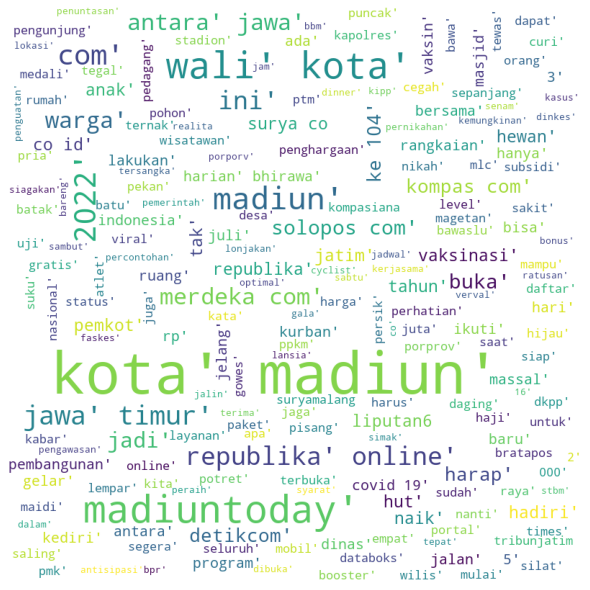

In [24]:
# menampilkan topik populer dalam google news
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"madiun.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.stop_words:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests

In [ ]:
df4 = pd.read_csv(df2)
df4["itzy"] = df4.itzy.str.replace(r'[a-zA-Z]','')
df4.to_csv('itji')
df4_ = pd.read_csv('itji')

AttributeError: ignored

In [ ]:
def generate_wordcloud(news):
    
    wordcloud = WordCloud(width = 1200, height = 800, background_color='black', colormap = 'Accent').generate(news)
    plt.figure(figsize=(10,8),facecolor = 'black', edgecolor='black')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
generate_wordcloud(news)

TypeError: ignored